<a href="https://colab.research.google.com/github/laolucharles1/Mitosis-Neural-Network-Segmentation/blob/main/Inception_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import csv
import os, glob
import cv2
import pathlib as path
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tqdm import tqdm
from google.colab import files
from IPython.display import Image
import keras
from PIL import Image, ImageOps
import numpy as np
from tqdm._tqdm_notebook import tqdm_notebook as tqdm


<ipython-input-5-c10cceddac9d>:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
from pickle import FALSE
from keras.layers import Input, Lambda, Dense, Flatten
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from keras.applications import InceptionV3

#standardizes the size of each image
IMAGE_SIZE = (299,299,3) #change 3 to a 1 to represent 1 color
# paths to training and test data sets
train_path = '/content/drive/MyDrive/Senior thesis/Train'
test_path = '/content/drive/MyDrive/Senior thesis/test'

inception = InceptionV3(input_shape=IMAGE_SIZE, weights = 'imagenet', include_top=FALSE)

for layer in inception.layers:
  layer.trainable = False

for (i, layer) in enumerate(inception.layers):
    print(str(i) + " " + layer.__class__.__name__, layer.trainable)



96112376/96112376 [==============================] - 1s 0us/step
0 InputLayer False
1 Conv2D False
2 BatchNormalization False
3 Activation False
4 Conv2D False
5 BatchNormalization False
6 Activation False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 MaxPooling2D False
11 Conv2D False
12 BatchNormalization False
13 Activation False
14 Conv2D False
15 BatchNormalization False
16 Activation False
17 MaxPooling2D False
18 Conv2D False
19 BatchNormalization False
20 Activation False
21 Conv2D False
22 Conv2D False
23 BatchNormalization False
24 BatchNormalization False
25 Activation False
26 Activation False
27 AveragePooling2D False
28 Conv2D False
29 Conv2D False
30 Conv2D False
31 Conv2D False
32 BatchNormalization False
33 BatchNormalization False
34 BatchNormalization False
35 BatchNormalization False
36 Activation False
37 Activation False
38 Activation False
39 Activation False
40 Concatenate False
41 Conv2D False
42 BatchNormalization False
43 Activation False
44

In [ ]:
from keras.layers.pooling.global_average_pooling2d import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras import regularizers

def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be 
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    top_model = Dense(num_classes,activation='softmax')(top_model)
    return top_model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.applications.vgg19 import VGG19
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# folders = glob('/content/drive/MyDrive/Senior thesis/Train/*')
num_classes = 3
FC_Head = lw(inception, num_classes)
# x = Flatten()(vgg.output)
# prediction = Dense(len(folders), activation = 'softmax')(x)
model = Model(inputs = inception.input, outputs = FC_Head)
print(model.summary())


#SGD, RMSprop, Nadam is good
# Adam, Adagrad and Adamax is average
#adadelta and Adamw, is bad
# relu and sigmoid activation is good

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics=['accuracy'])

In [ ]:
#Image generator
def to_grayscale_then_rgb(image):
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.grayscale_to_rgb(image)
    return image

def rgb_to_grayscale(image):
    image = image.convert("L")
    return image

def ctg(image):
    image = tf.image.rgb_to_grayscale(image)
    return image

def expand_greyscale_image_channels(image):
    image = tf.image.rgb_to_grayscale(image)
    grey_image_arr = np.array(image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

def cropper(image):
    image_arr = np.array(image)
    image_arr = image_arr[100:900, 200:1300]
    image = Image.fromarray(image_arr)
    return image

def newcropper(image):
  image = image[100:900, 200:1300]
  return image


train_datagen = ImageDataGenerator(rescale= 1./255,  horizontal_flip= True, vertical_flip= True )  
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Senior thesis/Train',
                                                 target_size=(224,224),
                                                 batch_size = 16,
                                                 class_mode='categorical', 
                                                 )


Found 1048 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Senior thesis/test',
                                            target_size=(224,224),
                                            batch_size = 16,
                                            class_mode='categorical')

Found 187 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
    training_set, 
    validation_data=test_set,
    epochs = 15,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

<ipython-input-36-97061be45a51>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
66/66 [==============================] - 242s 4s/step - loss: 0.7384 - accuracy: 0.6985 - val_loss: 0.5125 - val_accuracy: 0.7914
Epoch 2/15
66/66 [==============================] - 177s 3s/step - loss: 0.5275 - accuracy: 0.7872 - val_loss: 0.4364 - val_accuracy: 0.8235
Epoch 3/15
66/66 [==============================] - 175s 3s/step - loss: 0.4270 - accuracy: 0.8216 - val_loss: 0.4695 - val_accuracy: 0.7807
Epoch 4/15
66/66 [==============================] - 172s 3s/step - loss: 0.4158 - accuracy: 0.8416 - val_loss: 0.4040 - val_accuracy: 0.8342
Epoch 5/15
66/66 [==============================] - 164s 3s/step - loss: 0.3734 - accuracy: 0.8435 - val_loss: 0.4981 - val_accuracy: 0.7540
Epoch 6/15
66/66 [==============================] - 149s 2s/step - loss: 0.3719 - accuracy: 0.8492 - val_loss: 0.3866 - val_accuracy: 0.8396
Epoch 7/15
66/66 [==============================] - 151s 2s/step - loss: 0.3702 - accuracy: 0.8464 - val_loss: 0.3560 - val_accuracy: 0.8342
Epoch 8/15
66

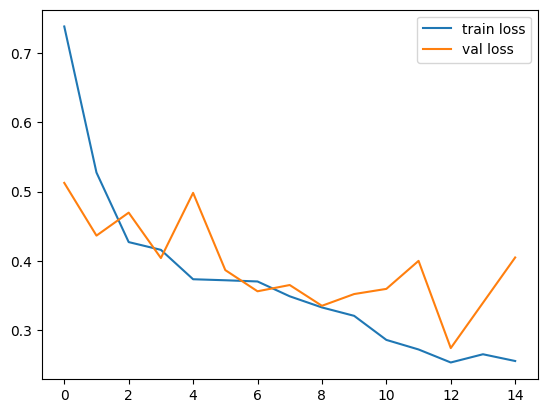

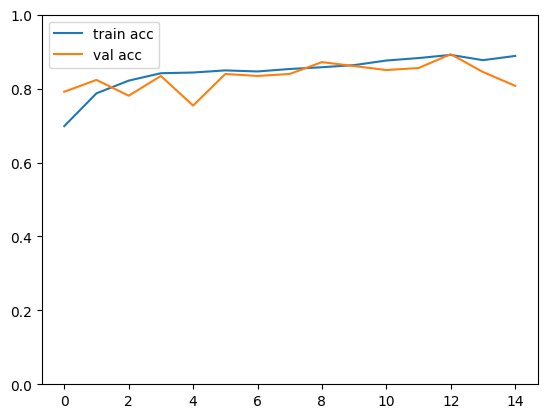

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
#plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal Loss')


#plot the accuracy
plt.plot(r.history['accuracy'], label = 'train acc')
plt.ylim([0,1])
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.ylim([0,1])
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
def neuralnetwork(file):
  image = image[100:900, 200:1300]
  return image

In [ ]:
import glob 
x = []
test_y = [] 
test_x = []
path = "/content/drive/MyDrive/Senior thesis/Test Set/*.*"
for file in glob.glob(path):
  x.append(file)

print(len(x))

for i in range(len(x)):
  print(x[i])
  test_x = [] 
  image = cv2.imread(x[i]) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (299,299), interpolation = cv2.INTER_AREA) 
  test_x.append(image)

#Then pre-process the test image:
  test_x = np.asarray(test_x) 
  test_processed_x = test_x.astype("float")/255.0
#Then you can predict from your model like this:

  test_predictions = model.predict(test_processed_x, batch_size=1) 
  print(test_predictions.shape) 
  print(test_predictions[0])

306
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0000.tif
1/1 [==============================] - 0s 249ms/step
(1, 3)
[2.3500814e-07 2.8694376e-07 9.9999952e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0029.tif
1/1 [==============================] - 0s 233ms/step
(1, 3)
[0.03104088 0.08991855 0.8790406 ]
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0028.tif
1/1 [==============================] - 0s 225ms/step
(1, 3)
[0.00742304 0.84079325 0.15178363]
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0027.tif
1/1 [==============================] - 0s 304ms/step
(1, 3)
[0.01571099 0.09494524 0.8893438 ]
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0024.tif
1/1 [==============================] - 0s 458ms/step
(1, 3)
[0.00809542 0.0301865  0.9617181 ]
/content/drive/MyDrive/Senior thesis/Test Set/Renamed Mitosis_1_sequence0025.tif
1/1 [=====================

1/1 [==============================] - 1s 827ms/step
(1, 3)
[2.4166102e-04 2.3431482e-04 9.9952400e-01]


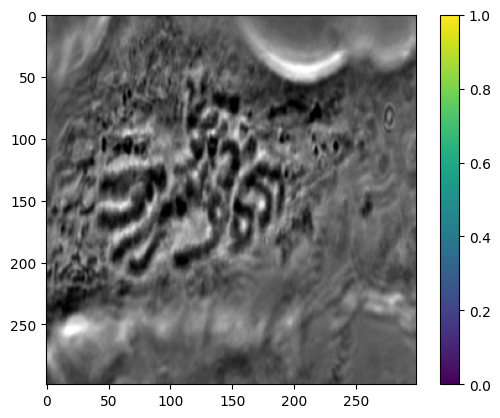

In [ ]:
#Load the image from disk

"/content/drive/MyDrive/Senior thesis/PTK2_Mad1_02/PTK2_Mad1_020125.tif"
"/content/drive/MyDrive/Senior thesis/PTK2_Mad1_02/PTK2_Mad1_020397.tif"
"/content/drive/MyDrive/Senior thesis/PTK2_Mad1_02/PTK2_Mad1_020425.tif"

test_x = [] 
image = cv2.imread("/content/drive/MyDrive/Senior thesis/PTK2_Mad1_02/PTK2_Mad1_020125.tif") 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (299,299), interpolation = cv2.INTER_AREA) 
test_x.append(image)

#Then pre-process the test image:
test_x = np.asarray(test_x) 
test_processed_x = test_x.astype("float")/255.0
#Then you can predict from your model like this:

test_predictions = model.predict(test_processed_x, batch_size=1) 
print(test_predictions.shape) 
print(test_predictions[0])
plt.figure()
plt.imshow(test_processed_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
import glob 
x = []
test_y = [] 
path = "/content/drive/MyDrive/Senior thesis/Test Set/*.*"
for file in glob.glob(path):
  x.append(file)

print(x)

['/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0070.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0149.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0073.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0050.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0177.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0163.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0053.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0151.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0084.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0141.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0031.tif', '/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0054.tif', '/content/drive/MyDrive/Sen

In [ ]:
import glob 
x = []
test_y = [] 
path = "/content/drive/MyDrive/Senior thesis/Test Set/*.*"
for file in glob.glob(path):
  x.append(file)

print(len(x))

for i in range(len(x)):
  imagex = cv2.imread(x[i])
  imagex = cv2.cvtColor(imagex, cv2.COLOR_BGR2RGB)
  imagex = cv2.resize(imagex, (299,299), interpolation = cv2.INTER_AREA)
  test_y.append(image)

print(len(test_y))
for x in range(len(test_y)): 
  solo = np.asarray(test_y[x])
  solodolo = solo.astype("float")/255.0
  predictions = model.predict(solodolo, batch_size=len(test_y)) 
  print(predictions)

  #Then pre-process the test image:
  #test_y = np.asarray(test_y) 
  #test_processed_y = test_y.astype("float")/255.0
  #print(i)
  #print(test_predictions[0])




189
189


InvalidArgumentError: ignored

In [ ]:
import cv2
path = "/content/drive/MyDrive/Senior thesis/Test Set/*.*"
for file in glob.glob(path):
  test_y = [] 
  image = cv2.imread(file) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (299,299), interpolation = cv2.INTER_AREA) 
  test_y.append(image)
  test_y = np.asarray(test_y) 
  test_processed_y = test_y.astype("float")/255.0
  print(file)
  print(test_predictions[0])
   

/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0070.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0149.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0073.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0050.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0177.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0163.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0053.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0151.tif
[2.4166102e-04 2.3431482e-04 9.9952400e-01]
/content/drive/MyDrive/S

In [ ]:
# /content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH0010.tif
i = 10
pic = "/content/drive/MyDrive/Senior thesis/Test Set/Cropped PTK1_Hec1_04 SH00" + str(i) + ".tif"
print(pic)